# Individual Assignment. Exploratory Data Analysis





In part 1 of this assignment, we will focus on exploratory data analysis of stock prices. Keep in mind, this assignment is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is challenging and you have to look things up on your own to try to solve the tasks issued. **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2017.

## Name :  Sonal Mendiratta
## ID       :  64446813

# Part 1


## Get the Data

In this section we will learn how to use pandas to directly read data from Yahoo finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).*

### The Imports


In [1]:
!pip install pandas-datareader
!pip install --upgrade pandas
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime
%matplotlib inline

     |████████████████████████████████| 112kB 4.5MB/s eta 0:00:01
Requirement already up-to-date: pandas in /Users/sonal/anaconda3/lib/python3.7/site-packages (0.25.3)


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2016 to Jan 1st 2017 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [39]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [40]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [41]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)


##### Add a Column_Company Name (this is filled out for you)

In [42]:
BAC["Company"]='BOA'
C["Company"]='Citi'
GS["Company"]='GoldmanSachs'
JPM["Company"]='JPMorgan'
MS["Company"]='MorganStanley'
WFC["Company"]='WellsFargo'

In [ ]:
## Need to reset index as currently the column 'Date' has been set as the index.

In [43]:
BAC.reset_index(inplace = True, drop = False)
WFC.reset_index(inplace = True,drop = False)
C.reset_index(inplace = True, drop = False)
JPM.reset_index(inplace = True, drop = False)
GS.reset_index(inplace = True, drop = False)
MS.reset_index(inplace=True, drop=False)

##### Draw the closing prices of BAC

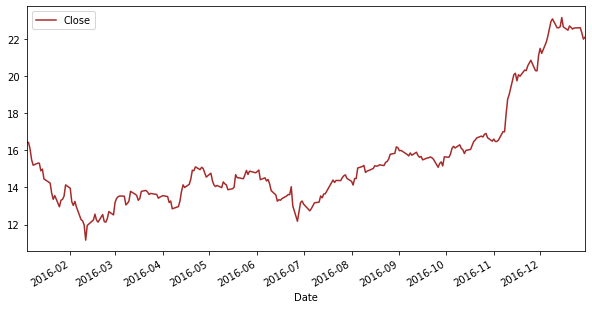

In [330]:
#Plotting just the close price
BAC.plot(x='Date', y='Close', figsize=(10,5), grid=False,color=['brown'])

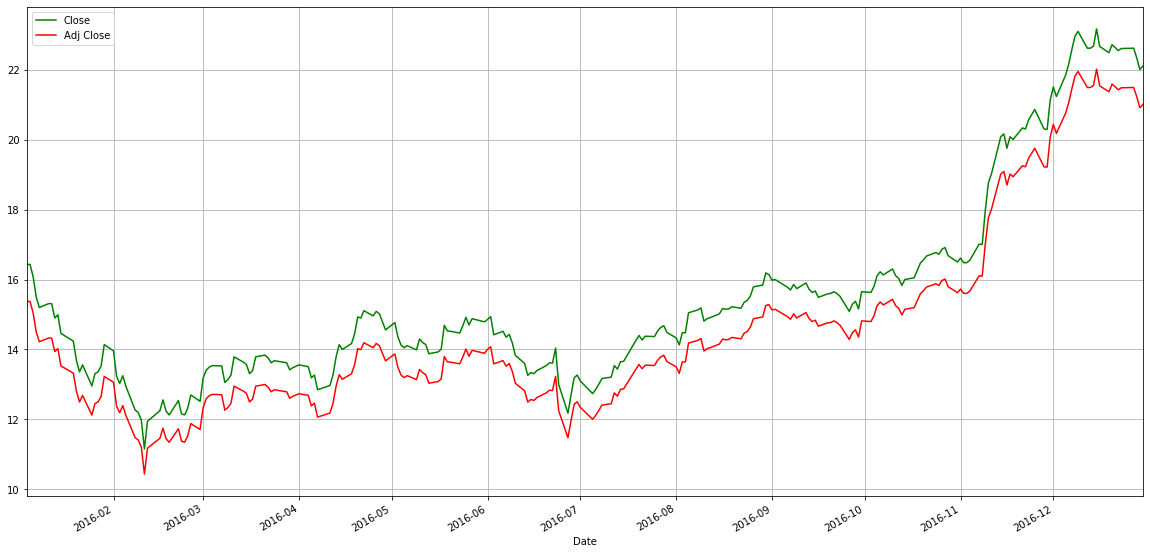

In [75]:
#Plotting both close price and adjusted close price together

BAC.plot(x='Date', y=['Close', 'Adj Close'], figsize=(20,10), grid=True,color=['green','red'])

In [89]:
#ensuring all the records are of the same period
df_list = [BAC,C,GS,JPM,MS,WFC]
for df in df_list:
    print(df["Date"].max())
    print(df["Date"].min())

2016-12-30 00:00:00
2016-01-04 00:00:00
2016-12-30 00:00:00
2016-01-04 00:00:00
2016-12-30 00:00:00
2016-01-04 00:00:00
2016-12-30 00:00:00
2016-01-04 00:00:00
2016-12-30 00:00:00
2016-01-04 00:00:00
2016-12-30 00:00:00
2016-01-04 00:00:00


##### Append all the data sets

In [44]:
# your code here
banks_all = BAC.append([C,GS,JPM,MS,WFC],sort=True,ignore_index=True)

In [24]:
banks_all

,Adj Close,Close,Company,Date,High,Low,Open,Volume
0,15.373302,16.430000,BOA,2016-01-04,16.490000,16.250000,16.450001,114888000.0
1,15.373302,16.430000,BOA,2016-01-05,16.590000,16.230000,16.520000,66670000.0
2,15.045812,16.080000,BOA,2016-01-06,16.290001,16.020000,16.190001,102760800.0
3,14.503113,15.500000,BOA,2016-01-07,15.900000,15.440000,15.730000,116255900.0
4,14.222406,15.200000,BOA,2016-01-08,15.940000,15.160000,15.940000,124782400.0
...,...,...,...,...,...,...,...,...
1507,50.831436,55.959999,WellsFargo,2016-12-23,55.980000,55.619999,55.779999,8313000.0
1508,50.822350,55.950001,WellsFargo,2016-12-27,56.099998,55.840000,55.900002,8893900.0
1509,50.250080,55.320000,WellsFargo,2016-12-28,56.080002,55.270000,55.980000,10609100.0
1510,49.814072,54.840000,WellsFargo,2016-12-29,55.459999,54.480000,55.189999,15933500.0


##### Derive the average closing price for each bank

In [25]:
# your code here
avg_close = banks_all.groupby('Company', as_index=False)['Close'].mean()
avg_close

,Company,Close
0,BOA,15.431905
1,Citi,46.386111
2,GoldmanSachs,169.113809
3,JPMorgan,65.622817
4,MorganStanley,29.848135
5,WellsFargo,48.957381


##### Plot the average closing price for each bank using matplotlib or plotly and cufflinks


In [33]:
avg_close = banks_all.groupby('Company', as_index=False).agg({'Close':'mean','Adj Close':'mean'})

In [34]:
avg_close.head()

,Company,Close,Adj Close
0,BOA,15.431905,14.551893
1,Citi,46.386111,43.279106
2,GoldmanSachs,169.113809,161.160826
3,JPMorgan,65.622817,59.855239
4,MorganStanley,29.848135,27.566326


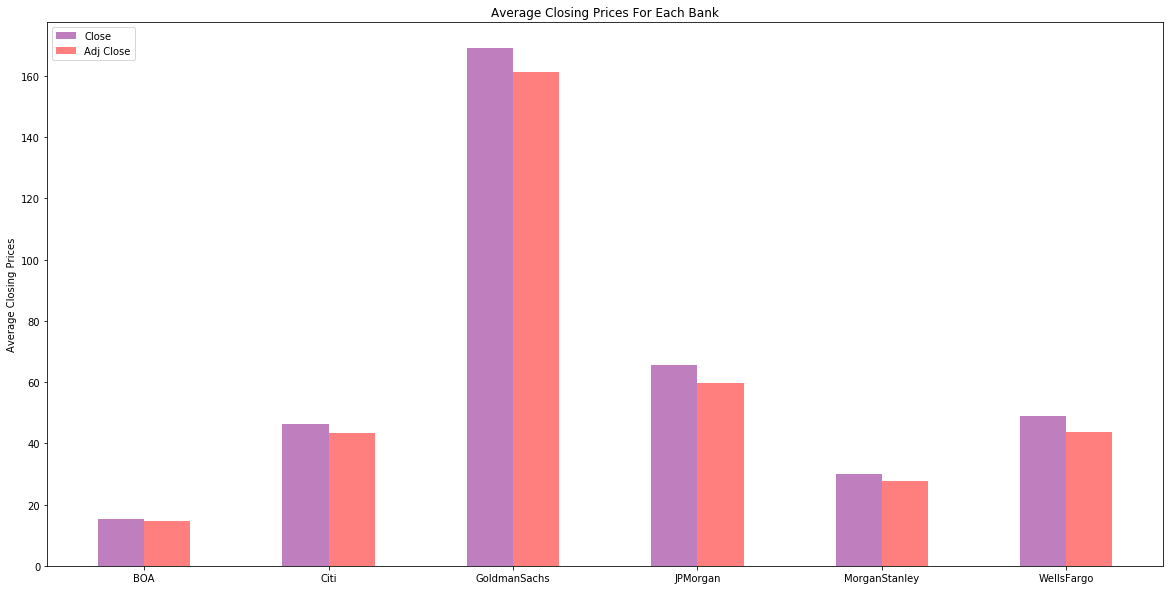

In [68]:
# your code here
# Setting the positions and width for the bars
pos = list(range(len(avg_close['Close']))) 
width = 0.25 

# Plotting the bars
fig, ax = plt.subplots(figsize=(20,10))

plt.bar(pos, avg_close['Close'], width, alpha=0.5,color='purple', label=avg_close['Company']) 
plt.bar([p + width for p in pos],avg_close['Adj Close'],width, alpha=0.5, color='red',label=avg_close['Company']) 

# Set the y axis label
ax.set_ylabel('Average Closing Prices')

# Set the chart's title
ax.set_title('Average Closing Prices For Each Bank')

# Set the position of the x ticks
ax.set_xticks([p + 0.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(avg_close['Company'])

# Adding the legend and showing the plot
plt.legend(['Close', 'Adj Close'], loc='upper left')
#plt.grid()
plt.show()


** What is the max Close price for each bank's stock throughout the time period?**

In [84]:
# your code here
max_close = banks_all.groupby('Company', as_index=False).agg({'Close':'max','Adj Close':'max'})
max_close

,Company,Close,Adj Close
0,BOA,23.160000,22.009644
1,Citi,61.090000,57.280842
2,GoldmanSachs,243.089996,233.328873
3,JPMorgan,87.129997,80.294456
4,MorganStanley,43.730000,40.780731
5,WellsFargo,57.290001,52.039543


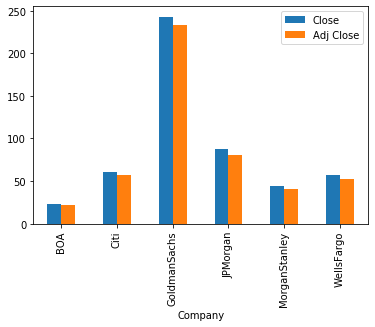

In [54]:
banks_all.groupby('Company')['Close','Adj Close'].max().plot(kind='bar')

** Create a new dataframe called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a new dataframe representing this return value. Use .groupby().**

In [70]:
banks_all['Company'].unique()

array(['BOA', 'Citi', 'GoldmanSachs', 'JPMorgan', 'MorganStanley',
       'WellsFargo'], dtype=object)

In [45]:
# your code here
banks_all['Daily_Returns_on_Close'] = banks_all.groupby('Company',as_index=False)['Close'].pct_change()
banks_all.head()


,Adj Close,Close,Company,Date,High,Low,Open,Volume,Daily_Returns_on_Close
0,15.373302,16.43,BOA,2016-01-04,16.490000,16.25,16.450001,114888000.0,NaN
1,15.373302,16.43,BOA,2016-01-05,16.590000,16.23,16.520000,66670000.0,0.000000
2,15.045812,16.08,BOA,2016-01-06,16.290001,16.02,16.190001,102760800.0,-0.021303
3,14.503113,15.50,BOA,2016-01-07,15.900000,15.44,15.730000,116255900.0,-0.036070
4,14.222406,15.20,BOA,2016-01-08,15.940000,15.16,15.940000,124782400.0,-0.019355


In [46]:
returns = banks_all
returns.shape

(1512, 9)

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. Did anything significant happen that day?**

### Best Days for each Bank

In [47]:
max_returns = returns.loc[returns.groupby('Company')['Daily_Returns_on_Close'].idxmax()]
max_df = max_returns[['Company','Date','Daily_Returns_on_Close']]
max_df

,Company,Date,Daily_Returns_on_Close
28,BOA,2016-02-12,0.070789
280,Citi,2016-02-12,0.073185
720,GoldmanSachs,2016-11-09,0.058872
784,JPMorgan,2016-02-12,0.083286
1224,MorganStanley,2016-11-09,0.070968
1477,WellsFargo,2016-11-10,0.075849


### Worst Days for each Bank

In [48]:
min_returns = returns.loc[returns.groupby('Company')['Daily_Returns_on_Close'].idxmin(skipna=True)]
min_df = min_returns[['Company','Date','Daily_Returns_on_Close']]
min_df

,Company,Date,Daily_Returns_on_Close
120,BOA,2016-06-24,-0.074074
372,Citi,2016-06-24,-0.093567
624,GoldmanSachs,2016-06-24,-0.070745
876,JPMorgan,2016-06-24,-0.069477
1128,MorganStanley,2016-06-24,-0.101502
1380,WellsFargo,2016-06-24,-0.045919


** Please state here what you have noticed. Did anything significant happen in that time frame? **

# Insights
### Best Days
* BOA, Citi and JP Morgan had the highest return on the same date- 2016-02-12. This was because of the Brexit Vote Announcement by the British Prime Minister David Cameron. 
* Source:
    * https://en.wikipedia.org/wiki/2015%E2%80%9316_stock_market_selloff
* GoldmanSachs,MorganStanley had the highest return on 2016-11-09 while Wells Fargo followed the next day. The reason for these high returns were due to investors' anticipation that Trump's presidency will lead to less regulation. 
* Source: 
    * https://money.cnn.com/2016/11/09/investing/dow-jones-trump-wins-election/index.html
    * https://economictimes.indiatimes.com/news/international/business/five-events-that-shook-world-economy-in-2016/articleshow/56182833.cms
     

### Worst Days
* The Low Return Date for all the banks were 2016-06-24. The main cause for this was the Brexit Backlash. 
* Source:
    * https://en.wikipedia.org/wiki/2015%E2%80%9316_stock_market_selloff
    * __Quote__ : _"The vote led to stock market crashes around the world. Investors in worldwide stock markets lost more than the equivalent of 2 trillion United States dollars on 24 June 2016, making it the worst single day loss in history."_


** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? **

In [89]:
#  your code here
returns.groupby('Company', as_index=False).agg({'Daily_Returns_on_Close':'std'})

,Company,Daily_Returns_on_Close
0,BOA,0.020209
1,Citi,0.020060
2,GoldmanSachs,0.016886
3,JPMorgan,0.015472
4,MorganStanley,0.020555
5,WellsFargo,0.015015


#### Riskiest Stock

* **Morgan Stanley** can be considered to be the riskiest bank due to the high variability. The standard deviation of the daily returns of this stock is more than the standard deviation of the daily returns of any other bank.





** Which would you classify as the riskiest for the year 2016? **

In [90]:
# your code here
#### Same as above :)

** Create a density plot using any library you like to visualize the previous year's return for each bank **

In [ ]:
# your code here

# Density Plot
### Method 1 - Seaborn

In [98]:
import seaborn as sns

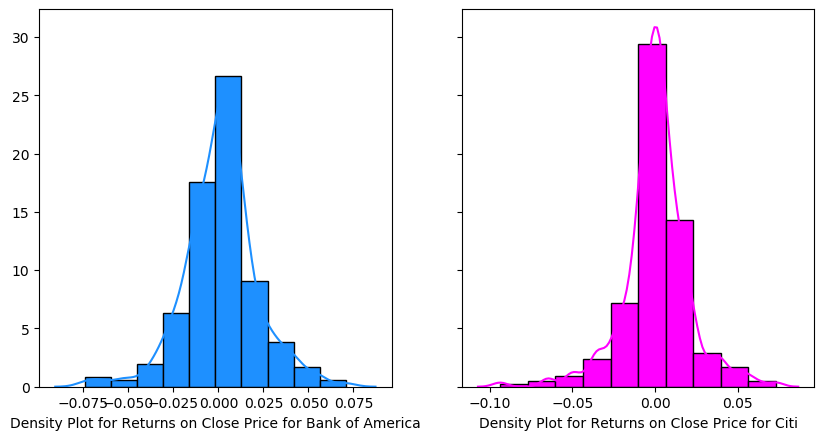

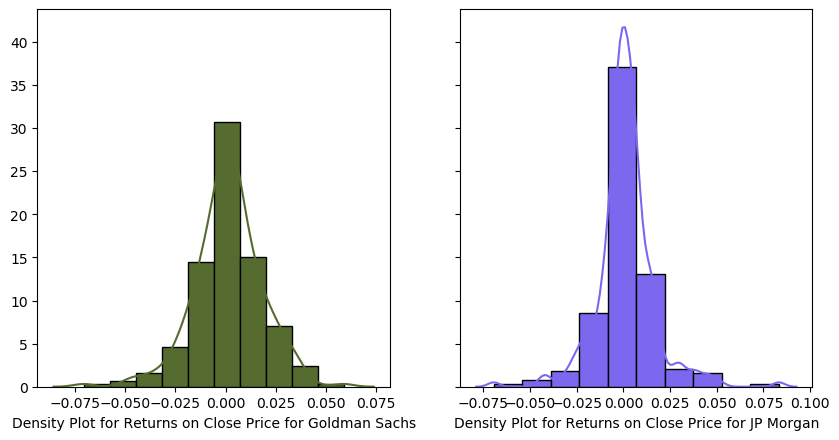

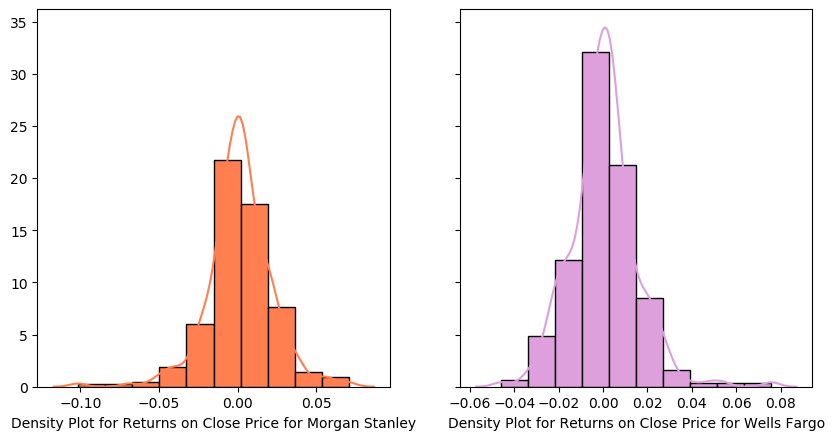

In [249]:
x1 = returns.loc[returns.Company=='BOA', ['Daily_Returns_on_Close']].dropna()
x2 = returns.loc[returns.Company=='Citi', ['Daily_Returns_on_Close']].dropna()
x3 = returns.loc[returns.Company=='GoldmanSachs', ['Daily_Returns_on_Close']].dropna()
x4 = returns.loc[returns.Company=='JPMorgan', ['Daily_Returns_on_Close']].dropna()
x5 = returns.loc[returns.Company=='MorganStanley', ['Daily_Returns_on_Close']].dropna()
x6 = returns.loc[returns.Company=='WellsFargo', ['Daily_Returns_on_Close']].dropna()


fig, axes = plt.subplots(1,2, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x1,color="dodgerblue", ax=axes[0], axlabel='Density Plot for Returns on Close Price for Bank of America',bins=10,hist_kws={'edgecolor':'black', 'alpha':1.0})
sns.distplot(x2,color="fuchsia", ax=axes[1], axlabel='Density Plot for Returns on Close Price for Citi',bins=10,hist_kws={'edgecolor':'black', 'alpha':1.0})

fig, axes = plt.subplots(1,2, figsize=(10, 5), sharey=True, dpi=100)
sns.distplot(x3,color="darkolivegreen", ax=axes[0], axlabel='Density Plot for Returns on Close Price for Goldman Sachs',bins=10,hist_kws={'edgecolor':'black', 'alpha':1.0})
sns.distplot(x4,color="mediumslateblue", ax=axes[1], axlabel='Density Plot for Returns on Close Price for JP Morgan',bins=10,hist_kws={'edgecolor':'black', 'alpha':1.0})

fig, axes = plt.subplots(1,2, figsize=(10,5), sharey=True, dpi=100)
sns.distplot(x5,color="coral", ax=axes[0], axlabel='Density Plot for Returns on Close Price for Morgan Stanley',bins=10,hist_kws={'edgecolor':'black', 'alpha':1.0})
sns.distplot(x6,color="plum", ax=axes[1], axlabel='Density Plot for Returns on Close Price for Wells Fargo',bins=10,hist_kws={'edgecolor':'black', 'alpha':1.0})

# Density Plot
### Method 2

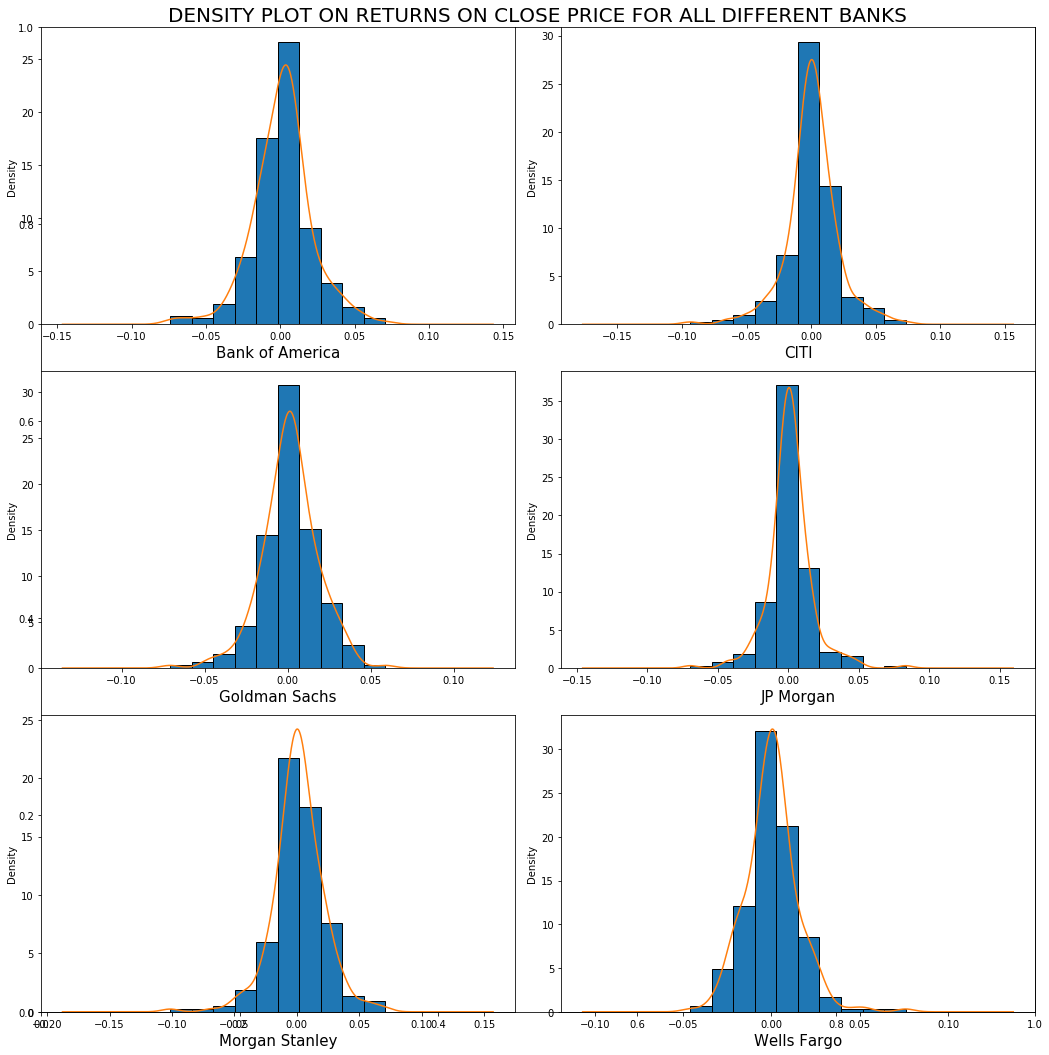

In [245]:
fig = plt.figure(figsize=(15,15)) # create a figure object
plt.title("DENSITY PLOT ON RETURNS ON CLOSE PRICE FOR ALL DIFFERENT BANKS",fontsize=20)

# Create the first subfigure
sub1 = fig.add_subplot(3,2,1) # create an axes object in the figure, 2x2 grid, 1st subplot.
sub1.set_xlabel('Bank of America',fontsize=15)
sub1.set_ylabel('Returns on Close Price')
x1 = returns.loc[returns.Company=='BOA', ['Daily_Returns_on_Close']].dropna()
x1.Daily_Returns_on_Close.hist(density = True,alpha=1.0,edgecolor='black')
x1.Daily_Returns_on_Close.plot(kind='kde')


# Create the second subfigure
sub2 = fig.add_subplot(3,2,2)
sub2.set_xlabel('CITI',fontsize=15)
sub2.set_ylabel('Returns on Close Price')
x2 = returns.loc[returns.Company=='Citi', ['Daily_Returns_on_Close']].dropna()
x2.Daily_Returns_on_Close.hist(density = True,alpha=1.0,edgecolor='black')
x2.Daily_Returns_on_Close.plot(kind='kde')


# Create the third subfigure
sub3 = fig.add_subplot(3,2,3)
sub3.set_xlabel('Goldman Sachs',fontsize=15)
sub3.set_ylabel('Returns on Close Price')
x3 = returns.loc[returns.Company=='GoldmanSachs', ['Daily_Returns_on_Close']].dropna()
x3.Daily_Returns_on_Close.hist(density = True,alpha=1.0,edgecolor='black')
x3.Daily_Returns_on_Close.plot(kind='kde')


# Create the fourth subfigure
sub4 = fig.add_subplot(3,2,4)
sub4.set_xlabel('JP Morgan',fontsize=15)
sub4.set_ylabel('Returns on Close Price')
x4 = returns.loc[returns.Company=='JPMorgan', ['Daily_Returns_on_Close']].dropna()
x4.Daily_Returns_on_Close.hist(density = True,alpha=1.0,edgecolor='black')
x4.Daily_Returns_on_Close.plot(kind='kde')


sub5 = fig.add_subplot(3,2,5)
sub5.set_xlabel('Morgan Stanley',fontsize=15)
sub5.set_ylabel('Returns on Close Price')
x5 = returns.loc[returns.Company=='MorganStanley', ['Daily_Returns_on_Close']].dropna()
x5.Daily_Returns_on_Close.hist(density = True,alpha=1.0,edgecolor='black')
x5.Daily_Returns_on_Close.plot(kind='kde')


sub6 = fig.add_subplot(3,2,6)
sub6.set_xlabel('Wells Fargo',fontsize=15)
sub6.set_ylabel('Returns on Close Price')
x6 = returns.loc[returns.Company=='WellsFargo', ['Daily_Returns_on_Close']].dropna()
x6.Daily_Returns_on_Close.hist(density = True,alpha=1.0,edgecolor='black')
x6.Daily_Returns_on_Close.plot(kind='kde')


plt.tight_layout() 
plt.savefig("normalvars.png", dpi=150)

### Moving Averages

** Please derive the moving averages for these stocks in the year 2016. Use .rolling() in pandas to get the rolling average calculation. ** 



In [299]:
# your code here
close_price = banks_all[['Company','Close','Date']]
close_price_pivoted = close_price.pivot_table('Close', index='Date', columns='Company')
close_price_rolled = close_price_pivoted.rolling(window=30).mean()

In [300]:
close_price_pivoted.head()

Company,BOA,Citi,GoldmanSachs,JPMorgan,MorganStanley,WellsFargo
Date,,,,,,
2016-01-04,16.43,51.130001,177.139999,63.619999,31.480000,52.910000
2016-01-05,16.43,50.860001,174.089996,63.730000,31.280001,52.889999
2016-01-06,16.08,50.119999,169.839996,62.810001,30.500000,51.880001
2016-01-07,15.50,47.560001,164.619995,60.270000,28.980000,50.400002
2016-01-08,15.20,46.130001,163.940002,58.919998,28.379999,49.560001


In [309]:
##plotting 30 day averages

In [308]:
result = pd.merge(close_price_rolled['BOA'],close_price_pivoted['BOA'],on='Date', how='left')
result.head()

,BOA_x,BOA_y
Date,,
2016-01-04,NaN,16.43
2016-01-05,NaN,16.43
2016-01-06,NaN,16.08
2016-01-07,NaN,15.50
2016-01-08,NaN,15.20


In [323]:
result_upd=result.rename(columns={"BOA_x": "ClosePrice_MovingAvg", "BOA_y": "ClosePrice"})
result_upd.reset_index(inplace=True, drop=False)

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2016**

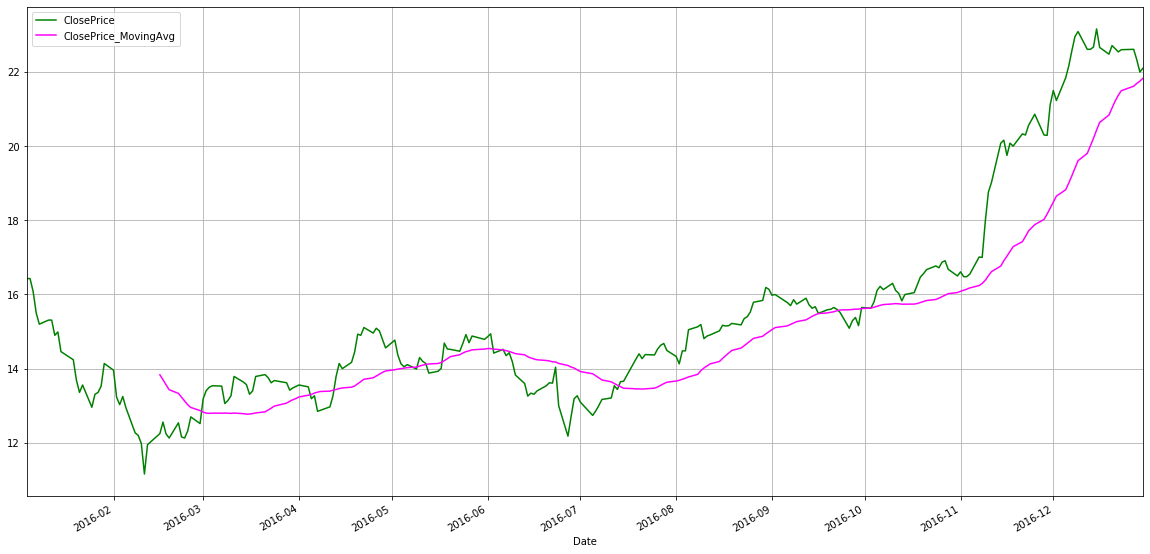

In [326]:
# your code here

result_upd.plot(x='Date', y=['ClosePrice', 'ClosePrice_MovingAvg'], figsize=(20,10), grid=True,color=['green','magenta'])

** Create a heatmap of the correlation between the stocks Close Price.**


In [295]:
# your code here

def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(250, 15, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

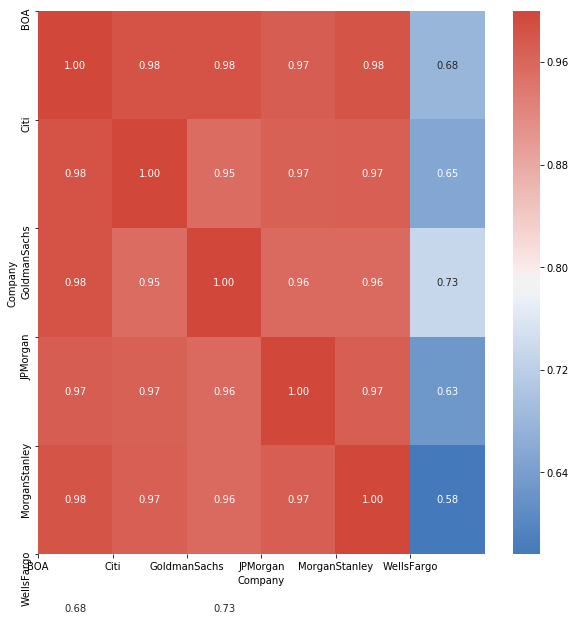

In [296]:
close_price = banks_all[['Company','Close','Date']]
close_price_pivoted = close_price.pivot_table('Close', index='Date', columns='Company')

#Calling the function here
heatMap(close_price_pivoted)

# Part 2. 

Please generate some visualization using the crunchbase database you downloaded for the midterm. Feel free to use any plotting packages (in Python), and generate any types of figures. You may also comment on the generated figures, and explain any insights you have obtained. 

In [1]:
import sqlite3
%load_ext sql

In [7]:
conn = sqlite3.connect("crunchbase_analysis.db")

In [2]:
%sql sqlite:///crunchbase_analysis.db

'Connected: @crunchbase_analysis.db'

In [17]:
%sql SELECT * FROM crunchbase_companies LIMIT 5

 * sqlite:///crunchbase_analysis.db
Done.


permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_at_clean,id
/company/8868,8868,http://www.8868.cn,None,None,operating,None,None,unknown,None,1.0,None,None,1
/company/21e6,2.10E+07,None,None,5050000.0,operating,USA,CA,SF Bay,San Francisco,1.0,1/1/13,2013-01-01,2
/company/club-domains,.Club Domains,http://dotclub.com,software,7000000.0,operating,USA,FL,Fort Lauderdale,Oakland Park,1.0,10/10/11,2011-10-10,3
/company/fox-networks,.Fox Networks,http://www.dotfox.com,advertising,4912394.0,closed,ARG,None,Buenos Aires,Buenos Aires,1.0,None,None,4
/company/a-list-games,[a]list games,http://www.alistgames.com,games_video,9300000.0,operating,None,None,unknown,None,1.0,None,None,5


In [339]:
%sql SELECT * FROM crunchbase_acquisitions LIMIT 5

 * sqlite:///crunchbase_analysis.db
Done.


company_permalink,acquirer_permalink,acquirer_name,acquirer_category_code,acquirer_country_code,acquirer_state_code,acquirer_region,acquirer_city,price_amount,price_currency_code,acquired_at,acquired_at_cleaned,id
/company/waywire,/company/magnify,Magnify,games_video,USA,NY,New York,New York,None,USD,10/17/13,2013-10-17 00:00:00,1
/company/1-nation-technology,/company/vology,Vology,other,None,None,unknown,None,None,USD,1/1/06,2006-01-01 00:00:00,2
/company/1-stop-financial-service-centers-of-america,/company/confie-seguros,Confie Seguros,enterprise,USA,CA,Los Angeles,Buena Park,None,USD,2/3/14,2014-02-03 00:00:00,3
/company/1-800-contacts-2,/company/thomas-h-lee-partners,Thomas H. Lee Partners,None,USA,MA,Boston,Boston,None,USD,1/7/14,2014-01-07 00:00:00,4
/company/1000memories,/company/ancestry-com,Ancestry,ecommerce,USA,UT,Salt Lake City,Provo,None,USD,10/3/12,2012-10-03 00:00:00,5


In [18]:
%sql SELECT * FROM crunchbase_investments LIMIT 5

 * sqlite:///crunchbase_analysis.db
Done.


company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,investor_country_code,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id
/company/tokita-investments,Tokita Investments,consulting,JPN,None,TBD,Okinawa Ken,/company/01startups,01Startups,None,None,None,unknown,None,angel,9/26/13,2013-09,2013-Q3,2013.0,5000.0,1
/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,ecommerce,USA,NY,New York,New York,series-a,10/30/12,2012-10,2012-Q4,2012.0,2000000.0,2
/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,1/23/12,2012-01,2012-Q1,2012.0,20000.0,3
/company/utap,uTaP,messaging,USA,None,United States - Other,None,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,other,1/1/12,2012-01,2012-Q1,2012.0,20000.0,4
/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,USA,OH,Columbus,Columbus,angel,2/15/12,2012-02,2012-Q1,2012.0,20000.0,5


# Graph 1 - Getting the Names of Top 50 investors in terms of the number of companies they have invested in
# Insights 
* Y Combinator is has made the maximum number of investments overall. More than thrice the average number of companies invested in by the top 50 investors.
* Even among the top 50 investors, there is a huge variation. The top 5 investors have invested in approx. 4 times the number of companies invested in by the last 5 investors.

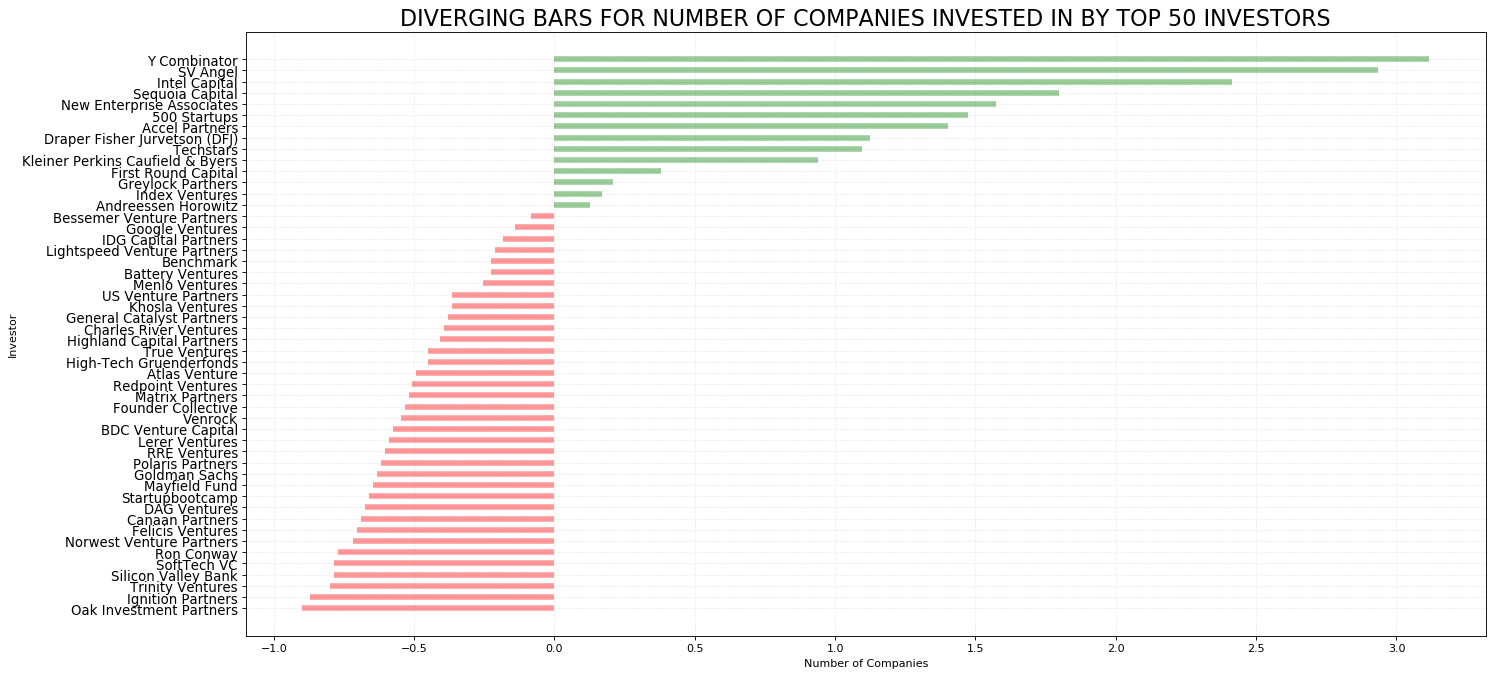

In [9]:
#code for data
investors = pd.read_sql_query("""select b.investor_name as investor,count(distinct a.permalink) as com_invested
                                        from crunchbase_companies a
                                        left join crunchbase_investments b
                                        on a.permalink = b.company_permalink
                                        where b.investor_name is not null    
                                        group by b.investor_name
                                        order by count(distinct a.permalink) desc
                                        limit 50""",conn)

#code for graph
x = investors.loc[:, ['com_invested']]
investors['com_invested_z'] = (x - x.mean())/x.std()
investors['colors'] = ['red' if x < 0 else 'green' for x in investors['com_invested_z']]
investors.sort_values('com_invested_z', inplace=True)
investors.reset_index(inplace=True)

# Draw plot
plt.figure(figsize=(20,10), dpi= 80)
plt.hlines(y=investors.index, xmin=0, xmax=investors.com_invested_z, color=investors.colors, alpha=0.4, linewidth=5)

# Decorations
plt.gca().set(ylabel='Investor', xlabel='Number of Companies')
plt.yticks(investors.index, investors.investor, fontsize=12)
plt.title('DIVERGING BARS FOR NUMBER OF COMPANIES INVESTED IN BY TOP 50 INVESTORS', fontdict={'size':20})
plt.grid(linestyle='--', alpha=0.2)
plt.show()

# Graph 2 - Understanding the trend of average amount of funding raised through the years.

# Insights
* The average amount of funding raised saw a considerable growth (with some dips) from the year 1985 to the year 2000.
* There was a drastic drop after the year 2000 possibly due to the recession in 2001 whose repurcussions lasted a few years.
* Even after almost two decades, none of the year have seen the same amount of funding being raised as it were in 2000.

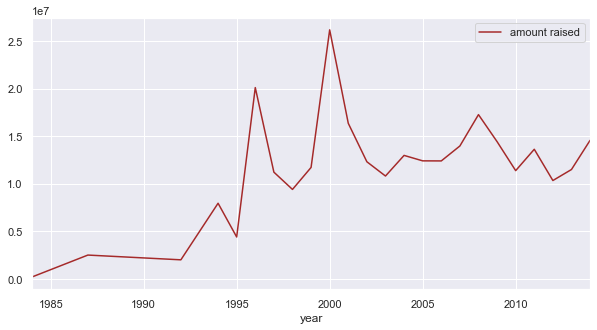

In [29]:
#code for data
avg_amount_raised = pd.read_sql_query("""select funded_year,
                                             avg(raised_amount_usd) as avg_amount_raised
                                        from crunchbase_investments
                                        where funded_year is not null 
                                        group by funded_year
                                        having avg(raised_amount_usd)>0
                                        order by funded_year
                                        """,conn)

year_amount = avg_amount_raised.rename(columns={'funded_year':'year','avg_amount_raised':'amount raised'})

#code for graph
year_amount.plot(x='year', y='amount raised', figsize=(10,5), grid=True,color=['brown'])

In [20]:
from chart_studio.plotly import plot, iplot
import cufflinks as cf

In [131]:
import pandas as pd
import numpy as np
%matplotlib inline

In [21]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0

4.3.0


In [22]:
cf.go_offline()

# Graph 3 - Comparing the top 20 countries by the number of companies founded in the last decade, that is, period from 2010 - 2020

# Insights
* USA has led the global market with the highest number of companies (startups as crunchbase tracks/used to track startups) getting founded since 2010.
* Interestingly, the number of companies founded by USA was 10 times the number of companies founded by the country in the second position, Great Britain.
* The number of companies founded by USA was also 4 times the total number of companies founded by the country in the second through fourth position.


In [26]:
#code for data
founded_country = pd.read_sql_query("""select country_code,count(distinct permalink) as companies
                                       from crunchbase_companies 
                                       where founded_at_clean > ('2010-01-01') 
                                       and founded_at_clean < ('2020-12-31')
                                       and country_code is not null
                                       group by country_code
                                       order by count(distinct permalink) desc
                                       limit 20
                                     """,conn)

#code for graph
founded_country.iplot(kind='bar',x='country_code',y='companies')

# Graph 4 - Distribution of companies by Categories

# Insights
* There are highest number of companies in the category 'Software' followed by 'biotech' and 'web'.
* The top 5 categories cover 45% of the total companies.

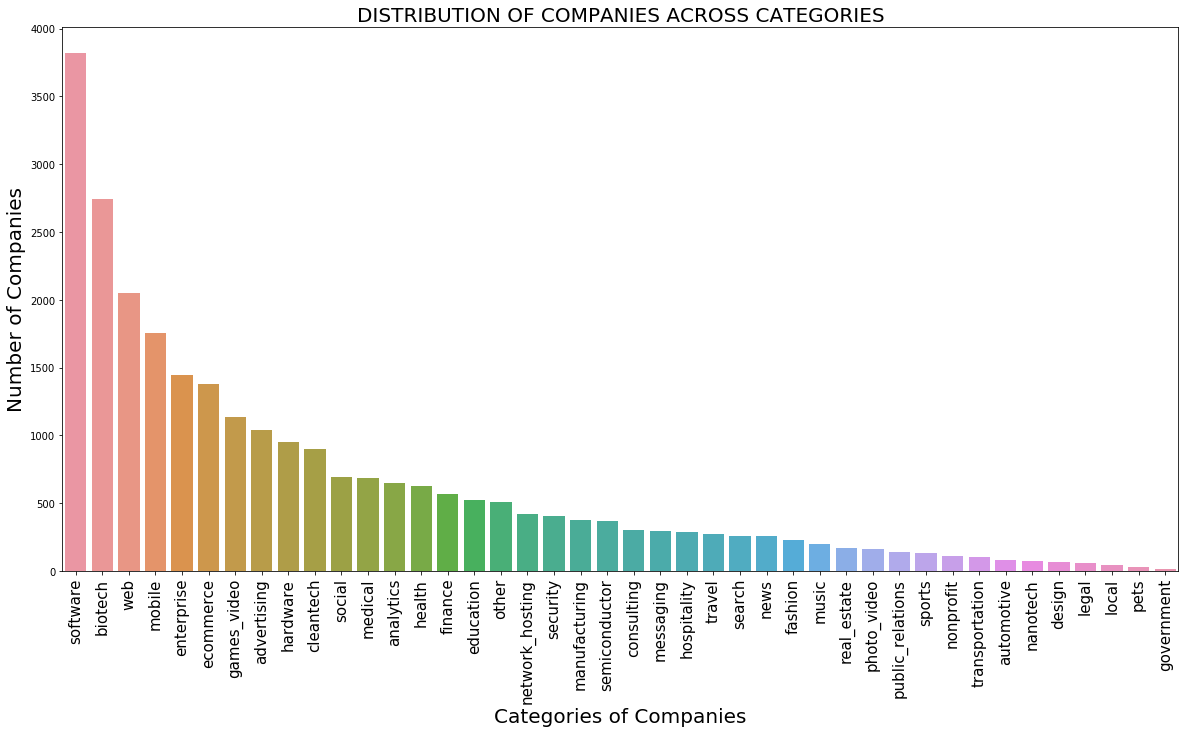

In [391]:
#code for data
categories = pd.read_sql_query("""select category_code,count(distinct permalink) as num_companies 
                                 from crunchbase_companies 
                                 where category_code is not null
                                 group by category_code
                                 order by count(distinct permalink) desc""",conn)

#code for graph
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
fig1 = sns.barplot(x = 'category_code', y = 'num_companies', data = categories)
plt.xlabel("Categories of Companies",fontsize=20)
plt.ylabel("Number of Companies",fontsize=20)
plt.title("DISTRIBUTION OF COMPANIES ACROSS CATEGORIES",fontsize=20) 
plt.xticks(rotation=90,fontsize=15)
plt.show(fig1)

# Graph 5 - Distribution of companies by founded and aquired in each state.

# Insights
* California leads in total number of companies founded as well as aquired.
* 37% of the total companies were founded in California, while 54% were founded in top three states - California, New York and Massachusetts

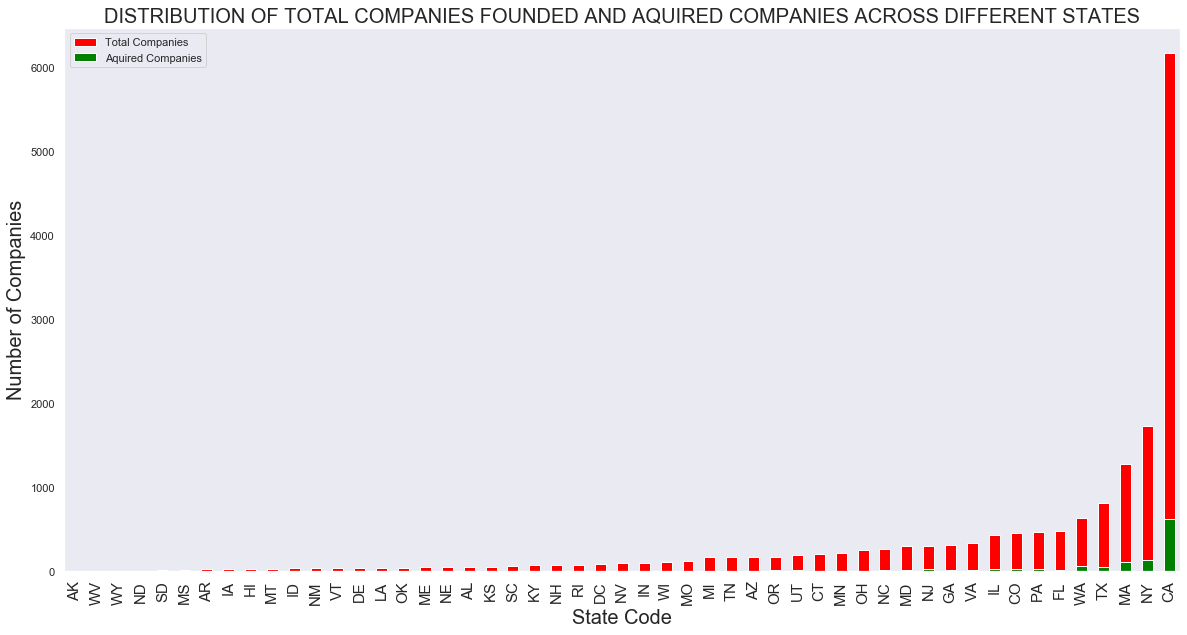

In [112]:
#code for data
states = pd.read_sql_query("""select a.state_code, 
                                     count(distinct a.permalink) as unique_comp,
                                     count(distinct b.company_permalink) as unique_comp_acq
                              from crunchbase_companies a
                              left join crunchbase_acquisitions b
                              on a.permalink = b.company_permalink
                              where a.state_code is not null
                              group by a.state_code
                              order by count(distinct a.permalink)""",conn)
#code for graph
a4_dims = (20, 10)
Companies=['Total Companies','Aquired Companies']
fig, ax = plt.subplots(figsize=a4_dims)
states.plot(x="state_code", y="unique_comp",ax=ax, kind="bar",color='red',grid=False)
states.plot(x="state_code", y="unique_comp_acq", kind="bar", ax=ax, color="green",grid=False)
plt.xlabel("State Code",fontsize=20)
plt.ylabel("Number of Companies",fontsize=20)
plt.title("DISTRIBUTION OF TOTAL COMPANIES FOUNDED AND AQUIRED COMPANIES ACROSS DIFFERENT STATES",fontsize=20) 
plt.xticks(rotation=90,fontsize=15)
plt.legend(Companies,loc=2)
plt.show()

# Graph 6 - Distribution of number of companies founded in the last decade,that is, period from 2010 - 2020

# Insights
* Highest number of companies were founded in 2011 followed by 2012 and 2013
* Perhaps, the data for 2018 and 2019 has not been captured yet.

In [144]:
import datetime

(array([2008., 2010., 2012., 2014., 2016., 2018., 2020.]),
 <a list of 7 Text xticklabel objects>)

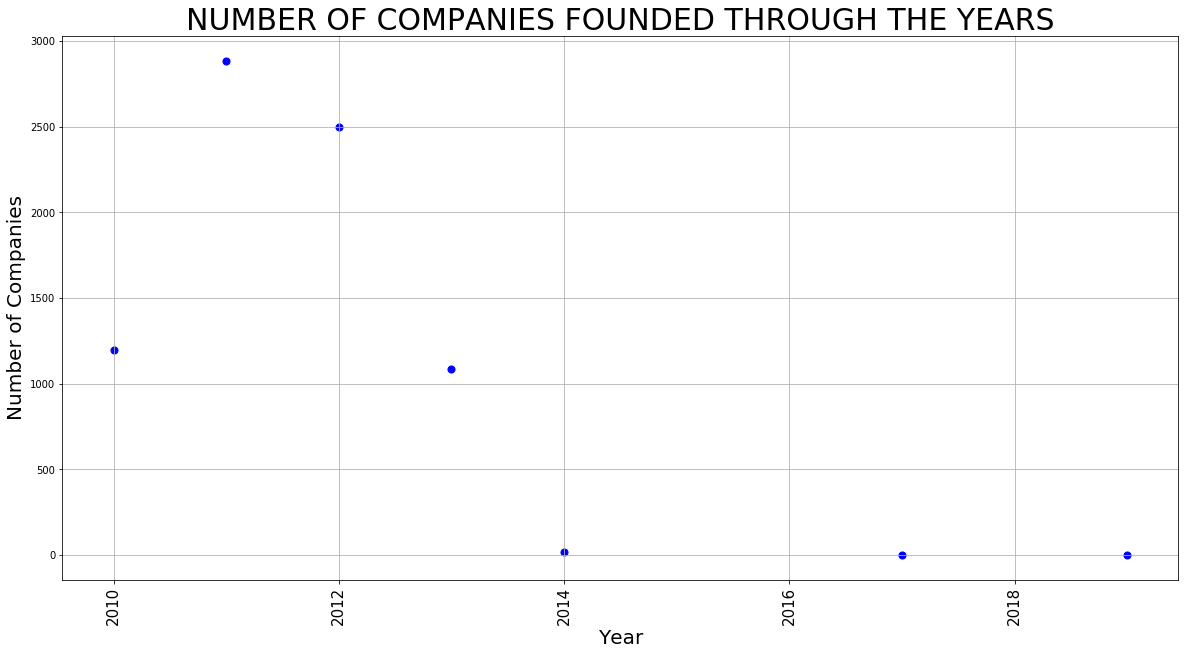

In [37]:
#code for data
founded = pd.read_sql_query("""select founded_at_clean,count(distinct permalink) as companies
                               from crunchbase_companies 
                                 where founded_at_clean > ('2010-01-01') and founded_at_clean < ('2020-12-31')
                                 group by founded_at_clean
                                 order by founded_at_clean """,conn)
founded['year'] = pd.DatetimeIndex(founded['founded_at_clean']).year
founded_year = founded.groupby('year', as_index=False).agg({'companies':'sum'})

#code for graph
founded_year.plot.scatter(x='year', y='companies', figsize=(20,10),grid=True,color='blue',s=50)
plt.xlabel("Year",fontsize=20)
plt.ylabel("Number of Companies",fontsize=20)
plt.title("NUMBER OF COMPANIES FOUNDED THROUGH THE YEARS",fontsize=30) 
plt.xticks(rotation=90,fontsize=15)


# Great Job!
